In [3]:
import pandas as pd
from enum import Enum

df = pd.read_csv("../data/ngrams/ngrams_frequencies_withNames.csv")
df["Names"] = df["Names"].str.replace("Tasdi-final", "Tsadi-final")
df["Names"] = df["Names"].str.replace(r'Tsadi(?!-final)', "Tsadi-medial", regex=True)

class A(Enum):
    Alef = "Alef"
    Ayin = "Ayin"
    Bet = "Bet"
    Dalet = "Dalet"
    Gimel = "Gimel"
    He = "He"
    Het = "Het"
    Kaf = "Kaf"
    Kaf_final = "Kaf-final"
    Lamed = "Lamed"
    Mem = "Mem"
    Mem_medial = "Mem-medial"
    Nun_final = "Nun-final"
    Nun_medial = "Nun-medial"
    Pe = "Pe"
    Pe_final = "Pe-final"
    Qof = "Qof"
    Resh = "Resh"
    Samekh = "Samekh"
    Shin = "Shin"
    Taw = "Taw"
    Tet = "Tet"
    Tsadi_final = "Tsadi-final"
    Tsadi_medial = "Tsadi-medial"
    Waw = "Waw"
    Yod = "Yod"
    Zayin = "Zayin"
    Space = " "

str_to_enum = {
    e.value: e for e in A
}


enums = []

for names in df["Names"]:
    list_names = names.split("_")
    enums.append(tuple(str_to_enum[name] for name in list_names))


In [8]:
ls = [len(e) for e in enums]
df["ls"] = ls

(df["ls"] * (df["Frequencies"] / df["Frequencies"].sum())).sum()

np.float64(3.7426672477663985)

In [12]:
df["ls"].quantile(0.9)

np.float64(6.0)

In [13]:
import sys
sys.path.append("..")

from alphabet import load_alphabet
s = load_alphabet()

In [ ]:
ws = []
hs = []

for images in s.values():

    for image in images:
        h, w = image.shape
        ws.append(w)
        hs.append(h)

import numpy as np

np.mean(ws), np.mean(hs)


(np.float64(37.73451327433628), np.float64(47.579013906447535))

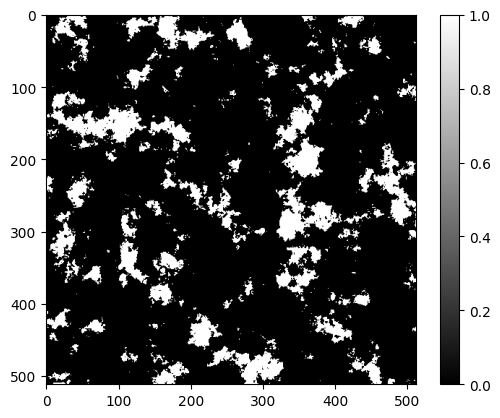

In [47]:
import numpy as np

def generate_perlin_noise_2d(shape, res, octaves=1, persistence=0.5, lacunarity=2.0, rng=None):
    if rng is None:
        rng = np.random.RandomState()

    def fade(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    def perlin(shape, res):
        y = np.linspace(0, res[0], shape[0], endpoint=False)
        x = np.linspace(0, res[1], shape[1], endpoint=False)
        gy, gx = np.meshgrid(y, x, indexing='ij')
        iy = gy.astype(int)
        ix = gx.astype(int)
        ty = gy - iy
        tx = gx - ix
        u = fade(tx)
        v = fade(ty)
        angles = 2 * np.pi * rng.rand(res[0] + 1, res[1] + 1)
        grads = np.dstack((np.cos(angles), np.sin(angles)))
        g00 = grads[iy, ix]
        g10 = grads[iy, ix + 1]
        g01 = grads[iy + 1, ix]
        g11 = grads[iy + 1, ix + 1]
        d00 = np.stack((tx,     ty    ), axis=-1)
        d10 = np.stack((tx - 1, ty    ), axis=-1)
        d01 = np.stack((tx,     ty - 1), axis=-1)
        d11 = np.stack((tx - 1, ty - 1), axis=-1)
        n00 = np.sum(g00 * d00, axis=-1)
        n10 = np.sum(g10 * d10, axis=-1)
        n01 = np.sum(g01 * d01, axis=-1)
        n11 = np.sum(g11 * d11, axis=-1)
        nx0 = n00 + u * (n10 - n00)
        nx1 = n01 + u * (n11 - n01)
        return nx0 + v * (nx1 - nx0)

    noise = np.zeros(shape)
    frequency = 1
    amplitude = 1
    max_amp = 0

    for _ in range(octaves):
        res_i = (int(res[0] * frequency), int(res[1] * frequency))
        noise += perlin(shape, res_i) * amplitude
        max_amp += amplitude
        amplitude *= persistence
        frequency *= lacunarity

    return noise / max_amp

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    n = generate_perlin_noise_2d((512, 512), (8, 8), octaves=8, persistence=0.7, lacunarity=2)

    mask = n < -0.1
    plt.imshow(mask, cmap='gray')
    plt.colorbar()
    plt.show()
